In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial.distance import cdist
from scipy.special import expit

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

from skimage import measure
import fresnel
import igl



In [28]:
#create a grid of the correct size:
grid_size = 100
a,b = np.ones([grid_size, grid_size]).nonzero()
gPoints = np.vstack([a,b]).T
print(gPoints.shape)

(10000, 2)


In [443]:
np.cos(np.pi*2)

1.0

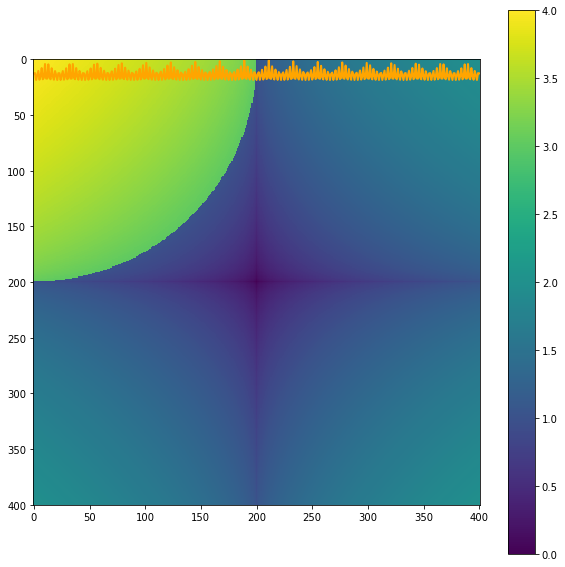

In [458]:
plt.figure(figsize=(10,10))
grid_spacing = 0.005
x,y = np.ogrid[-1/grid_spacing:1/grid_spacing+grid_spacing,-1/grid_spacing:1/grid_spacing+grid_spacing]
#Lame curve:
n=5/9
g = (np.abs(x*grid_spacing)**n+np.abs(y*grid_spacing)**n)

#second_contours = measure.find_contours(g,1)
plt.plot(second_contours[0][:, 1], second_contours[0][:, 0], linewidth=2, c='orange', label='new')

##add a circle at one of the corners:
g += (np.abs(x*grid_spacing+1)**2+np.abs(y*grid_spacing+1)**2< 1)*2

plt.imshow(g)
plt.colorbar()

In [451]:
g

array([[2.0706607 , 2.07002921, 2.08791798, ..., 0.08791798, 0.07002921,
        0.0706607 ],
       [2.07002921, 2.06939773, 2.0872865 , ..., 0.0872865 , 0.06939773,
        0.07002921],
       [2.08791798, 2.0872865 , 2.10517526, ..., 0.10517526, 0.0872865 ,
        0.08791798],
       ...,
       [0.08791798, 0.0872865 , 0.10517526, ..., 0.10517526, 0.0872865 ,
        0.08791798],
       [0.07002921, 0.06939773, 0.0872865 , ..., 0.0872865 , 0.06939773,
        0.07002921],
       [0.0706607 , 0.07002921, 0.08791798, ..., 0.08791798, 0.07002921,
        0.0706607 ]])

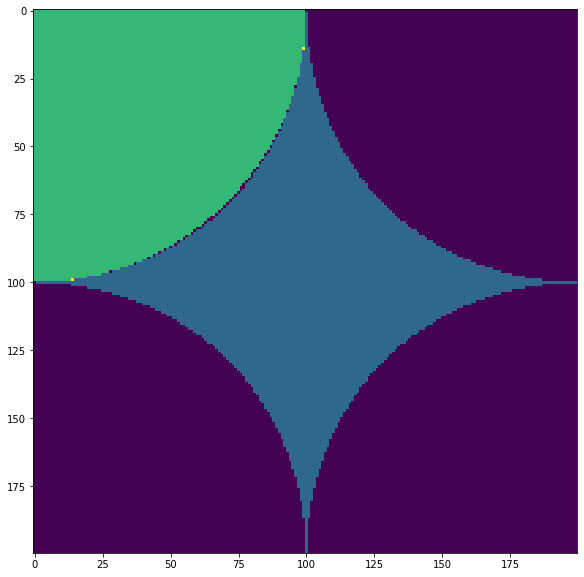

In [384]:
plt.figure(figsize=(10,10))

x,y = np.ogrid[-100:100,-100:100]
#Diamond thing:
#g = np.abs(x)*np.abs(y)< 1000

#Lame curve:
n=5/9

g = (np.abs(x/100)**n+np.abs(y/100)**n< 1).astype(int)

# ##This is really cool - it makes a series of circles going all around.
# g = (np.abs(np.sin(x/100))**0.55+np.abs(np.sin(y/100))**0.55< 1).astype(int)
# g = (np.abs(np.cos((x-160)/100))**0.55+np.abs(np.cos((y-160)/100))**0.55< 1).astype(int)


#g = (np.abs(x)**(2/3)+np.abs(y)**(2/3)< 20).astype(int)

#add a circle at one of the corners:
g += (np.abs(x+100)**2+np.abs(y+100)**2< 10000)*2

#ellipse:
#g = np.abs(x)**2+np.abs(y)**1.75< 1000

plt.imshow(g)

In [253]:
s=45
x,y,z = np.ogrid[-s:s,-s:s, -s:s]
g = (np.abs(x/s)**n+np.abs(y/s)**n + np.abs(z/s)**n< 1).astype(int)



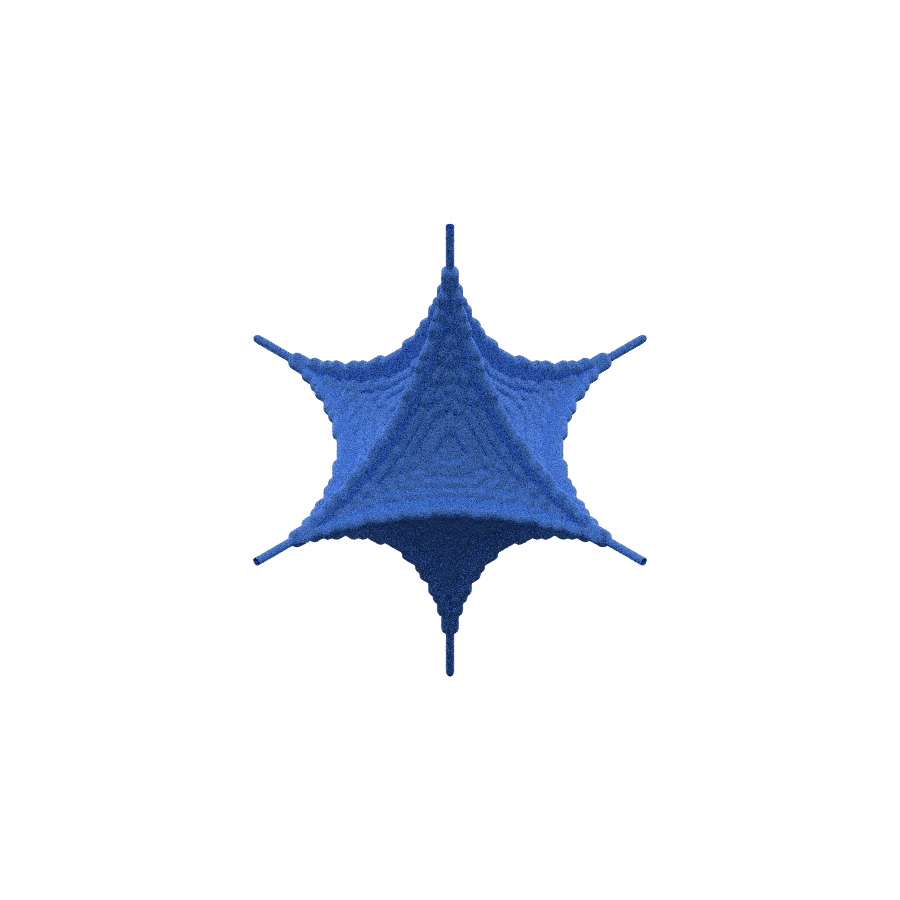

In [255]:
vert, faces, norm, values = measure.marching_cubes_lewiner(g,0)
lf = faces.copy()
lv = vert.copy()
lv, lf = igl.loop(vert, faces)
lv, lf = igl.loop(lv, lf)
scene1 = fresnel.Scene()
geom = fresnel.geometry.Mesh(scene1,vertices=lv[lf].reshape(-1,3),N=1)
geom.material = fresnel.material.Material(color=fresnel.color.linear([0.25,0.5,0.9]), roughness=0.6)
scene1.camera = fresnel.camera.fit(scene1,view='isometric', margin=0)
scene1.lights = fresnel.light.cloudy()
fresnel.pathtrace(scene1, samples=20, h=900, w=900)

In [29]:
centres = np.array([[45,50], [25,25]])
radii = np.array([30,10])

proberadius = 10

In [30]:
from scipy.special import expit, logit

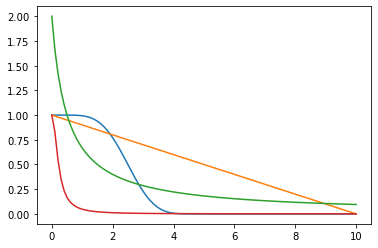

In [31]:
def lin(x, pr=10):
    #return 1*(1-expit(x*pr-10))

    return np.clip(1-x/pr, 0, 1)

from scipy.special import comb
def smoothstep(x, x_min=0, x_max=1, N=1):
    x = np.clip((x - x_min) / (x_max - x_min), 0, 1)
    result = 0
    for n in range(0, N + 1):
         result += comb(N + n, n) * comb(2 * N + 1, N - n) * (-x) ** n
    result *= x ** (N + 1)
    return 1-result

def smooth(x):
    return np.clip(1/(((x-1)**2+0.5)), 0,1)

def smooth(x):
    return 1/((x+0.5))

def f(x):
    return 0.05/(0.05+x**2)

def squared_exponential(distance):
    return 0.3*np.exp(-(0.4*distance)**2)

def bump(x):
    return np.exp(-1 / (1-x**2))

x = np.linspace(0,10,100)

plt.plot(x, smoothstep(x, x_max=proberadius/2,N=6))
plt.plot(x, lin(x, pr=proberadius))
plt.plot(x, smooth(x))
plt.plot(x, f(x))

In [256]:
##Get the distances from every graph point (rows) to every atom centre (columns)
distances =cdist(gPoints, centres)-radii

In [271]:
np.sum((distances/50)**(3/7),1)<1

/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in power
  """Entry point for launching an IPython kernel.
/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


array([False, False, False, ..., False, False, False])

In [284]:
#m = (np.prod(np.abs(distances), 1)<7)

m = np.sum((distances/25)**(3/7),1)<1

/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


In [387]:
gn = np.zeros([grid_size, grid_size])


grid = np.zeros([grid_size, grid_size])
grid[gPoints[:,0], gPoints[:,1]]=(distances).min(1)
#grid[gPoints[m][:,0], gPoints[m][:,1]]-=np.sum((np.abs(distances[m]))**(5/9),1)

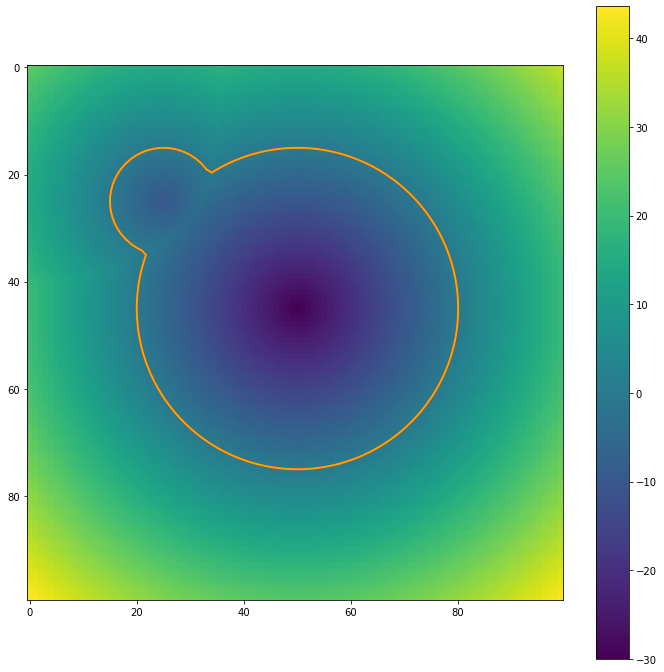

In [388]:
plt.figure(figsize=(12,12))
plt.imshow(grid)
plt.plot(contours[0][:, 1], contours[0][:, 0], linewidth=2, c='red', label='originl')

second_contours = measure.find_contours(grid,0)
plt.plot(second_contours[0][:, 1], second_contours[0][:, 0], linewidth=2, c='orange', label='new')

plt.colorbar()

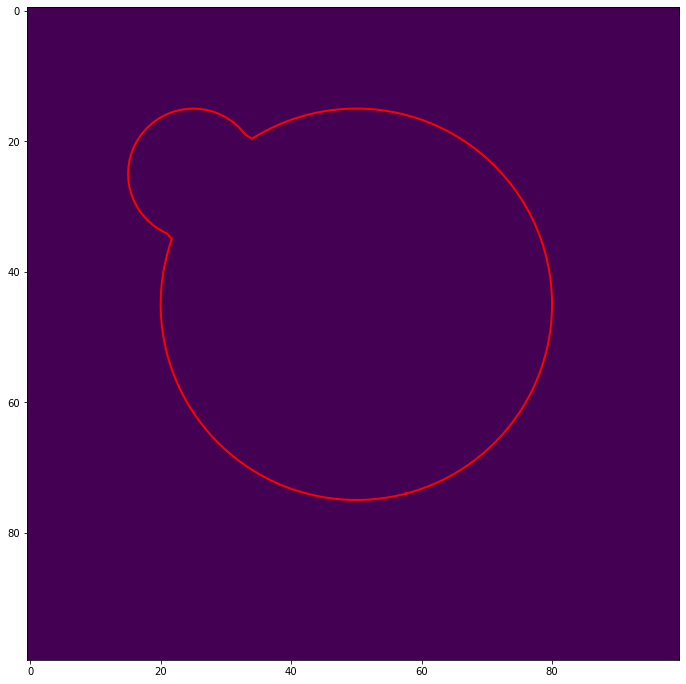

In [389]:
plt.figure(figsize=(12,12))
plt.imshow(gn)
plt.plot(contours[0][:, 1], contours[0][:, 0], linewidth=2, c='red', label='originl')

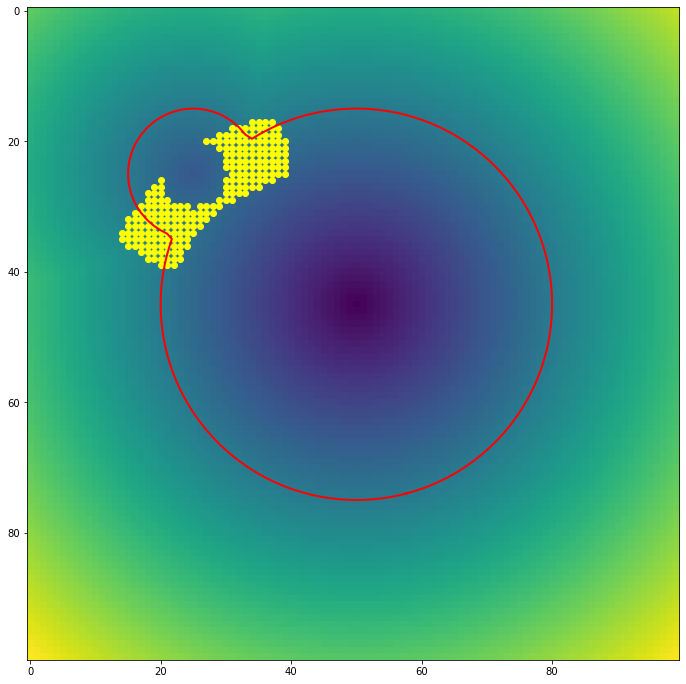

In [59]:
grid = np.zeros([grid_size, grid_size])
grid[gPoints[:,0], gPoints[:,1]]=(distances-radii).min(1)
contours = measure.find_contours(grid,0)

plt.figure(figsize=(12,12))
plt.plot(contours[0][:, 1], contours[0][:, 0], linewidth=2, c='red', label='originl')
plt.imshow(grid)
plt.scatter(pts[:,0], pts[:,1], c='yellow')

In [23]:
#Find the atom indices of the nearest distance to an atom surface:
argpart = np.argpartition(distances-radii, 1, axis=1)
one_nn = argpart[:,0]
long_radii = radii[one_nn]

In [25]:
#how close is each grid point to each atom:
to_atom_distance = distances-radii
#k = squared_exponential(to_atom_distance)
k = bump(np.clip(to_atom_distance,-1,1))
##ensure that the radius to the nearest atom is has a kernel of 1, meaning later
##we can just do a sum of k's to get the weighted sum of radii.
k[np.arange(k.shape[0]), one_nn]=1

/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


In [26]:
##Take only the distance to the nearest atom:
nearest_distances = distances[np.arange(one_nn.shape[0]), one_nn]
val = (nearest_distances-long_radii*k.sum(1))#*k.sum(1)
grid = np.zeros([grid_size, grid_size])
grid[gPoints[:,0], gPoints[:,1]]=val

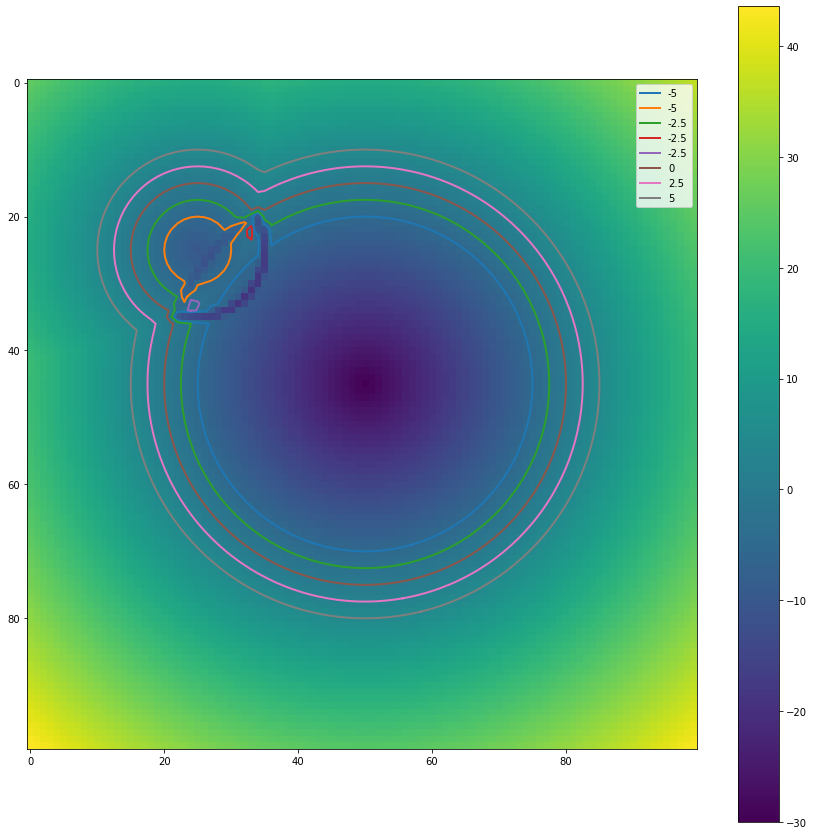

In [27]:
from skimage import measure

plt.figure(figsize=(15,15))
plt.imshow(grid)
plt.colorbar()

# cutoff = 0
# contours = measure.find_contours(grid,cutoff)
# plt.plot(contours[0][:,1], contours[0][:,0], linewidth=3, c='red')
for cutoff in [-5,-2.5, 0,2.5,5]:
    contours = measure.find_contours(grid,cutoff)
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=2, label=cutoff)
plt.legend()

# Changing to 3d:

In [424]:
mol = Chem.MolFromSmiles('CCCCCC1=CC(=C2C3C=C(CCC3C(OC2=C1)(C)C)C)O')
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol)
conf = mol.GetConformer()
positions = np.array([list(conf.GetAtomPosition(int(i))) for i in range(mol.GetNumAtoms())])
positions = (positions - np.mean(positions,0)) + 10
radii = np.array([Chem.GetPeriodicTable().GetRvdw(a.GetAtomicNum()) for a in mol.GetAtoms()])
radii = radii-0.2


atom_centres = positions.copy()
atom_centres -= np.min(atom_centres,0)

proberadius=1.4
molecule_volume = np.max(atom_centres) #in angstroms
grid_spacing = 0.2
buffer = 5 #angstrom
grid_size = int(np.rint(molecule_volume / grid_spacing) + np.rint(2*buffer/grid_spacing))

proberadius = proberadius/grid_spacing
radii = radii/grid_spacing

In [425]:
#create a grid of the correct size:

a,b,c = np.ones([grid_size, grid_size, grid_size]).nonzero()

gPoints = np.vstack([a,b,c]).T


#Calculate the minimum distance to atom centres (after mapping to grid units)
distances =(cdist(gPoints, (atom_centres+buffer)/grid_spacing))

#Find the atom indices of the nearest distance to an atom surface:
argpart = np.argpartition(distances-radii+(buffer/grid_spacing), 1, axis=1)
#argpart = np.argpartition(distances/radii, 1, axis=1)
one_nn = argpart[:,0]
long_radii = radii[one_nn]


In [427]:
#how close is each grid point to each atom:
to_atom_distance = 1.25*np.clip(distances/radii, 1, np.inf)
#k = sigmoid(to_atom_distance)
#k = lin(to_atom_distance)
#k = metaball(distances/20)
k = smooth(to_atom_distance)
#
##ensure that the radius to the nearest atom is has a kernel of 1. 
k[np.arange(k.shape[0]), one_nn]=1

In [428]:
##Take only the distance to the nearest atom:
nearest_distances = distances[np.arange(one_nn.shape[0]), one_nn]
val = (nearest_distances-long_radii*k.sum(1))
grid = np.zeros([grid_size, grid_size,grid_size])
grid[gPoints[:,0], gPoints[:,1], gPoints[:,2]]=val


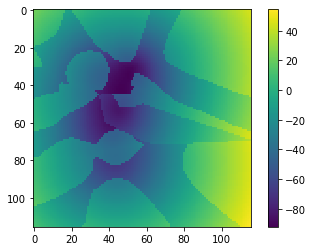

In [429]:
plt.imshow(grid[:,:,25])
plt.colorbar()

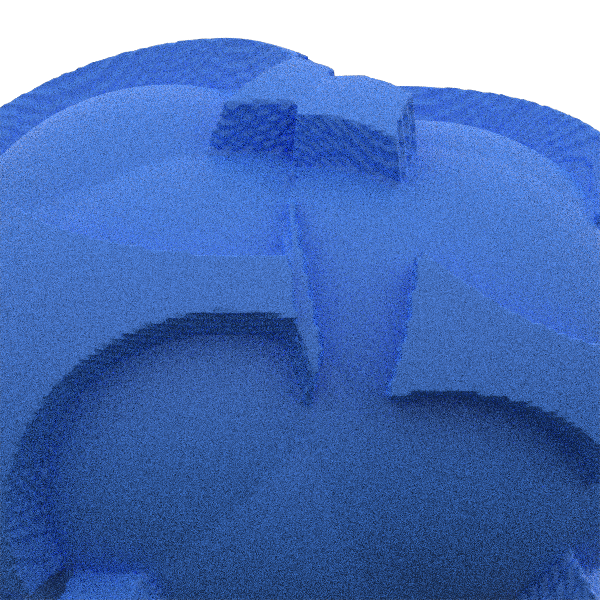

In [435]:
vert, faces, norm, values = measure.marching_cubes_lewiner(grid,15.5)
lf = faces.copy()
lv = vert.copy()
lv, lf = igl.loop(vert, faces)
#lv, lf = igl.loop(lv, lf)
scene1 = fresnel.Scene()
geom = fresnel.geometry.Mesh(scene1,vertices=lv[lf].reshape(-1,3),N=1)
geom.material = fresnel.material.Material(color=fresnel.color.linear([0.25,0.5,0.9]), roughness=0.6)
scene1.camera = fresnel.camera.fit(scene1,view='front', margin=0)
scene1.lights = fresnel.light.cloudy()
fresnel.pathtrace(scene1, samples=20, h=600, w=600)

In [201]:
atom_distances = cdist(atom_centres, atom_centres)

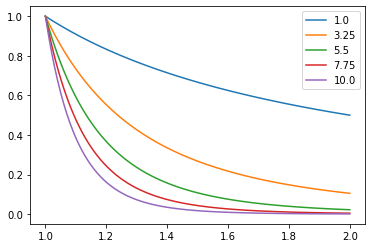

In [395]:
def smooth(x, power):
    return 1/((x)**power)

x = np.linspace(1,2,100)

for p in np.linspace(1, 10,5):
    plt.plot(x, smooth(x, p), label=p)
plt.legend()


In [396]:
# def squared_exponential(distance):
#     return 0.15*np.exp(-(2.5*(distance-1))**2)


# x = np.linspace(-2,3,100)
# plt.plot(x, squared_exponential(x))

In [458]:
adist = cdist(centres, centres)
sides = radii+proberadius

In [476]:
sides

array([40, 20])

In [475]:
sides**2

array([1600,  400])

In [488]:
from scipy.spatial.distance import squareform
np.arccos((cdist(centres, centres)**2 - sides**2) / np.prod(sides))


/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  


array([[       nan, 0.67413051],
       [2.3727991 , 2.0943951 ]])

In [489]:
(cdist(centres, centres)**2 - sides**2) / np.prod(sides)

array([[-2.     ,  0.78125],
       [-0.71875, -0.5    ]])

In [490]:
sides**2

array([1600,  400])

In [470]:
np.arccos(((sides**2).sum() - adist**2)/np.prod(sides) - np.pi/2)

array([[0.3785441 , 1.93055282],
       [1.93055282, 0.3785441 ]])

In [467]:
np.arccos(1.2)

/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arccos
  """Entry point for launching an IPython kernel.


nan

In [436]:
##Get the distances from every graph point (rows) to every atom centre (columns)
distances =cdist(gPoints, centres)
#Find the atom indices of the nearest distance to an atom surface:
argpart = np.argpartition(distances-radii, 1, axis=1)
one_nn = argpart[:,0]
long_radii = radii[one_nn]

#how close is each grid point to each atom:
to_atom_distance = 1.25*np.clip(distances/radii, 1,np.inf)
k = smooth(to_atom_distance, 3)
##ensure that the radius to the nearest atom is has a kernel of 1, meaning later
##we can just do a sum of k's to get the weighted sum of radii.
k[np.arange(k.shape[0]), one_nn]=1

##Take only the distance to the nearest atom:
nearest_distances = distances[np.arange(one_nn.shape[0]), one_nn]
val = (nearest_distances-long_radii)#*k.sum(1)
grid = np.zeros([grid_size, grid_size])
grid[gPoints[:,0], gPoints[:,1]]=val
contours = measure.find_contours(grid,0)
plt.figure(figsize=(15,15))
plt.plot(contours[0][:, 1], contours[0][:, 0], linewidth=2, label='originl')

val = (nearest_distances-(long_radii*k.sum(1)))
grid = np.zeros([grid_size, grid_size])
grid[gPoints[:,0], gPoints[:,1]]=val


plt.imshow(grid)
plt.colorbar()



for cutoff in [-2.5, 0,2.5,5]:
    contours = measure.find_contours(grid,cutoff)
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=2, label=cutoff)
plt.legend()

ValueError: XA and XB must have the same number of columns (i.e. feature dimension.)

/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


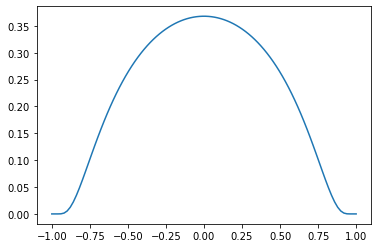

In [4]:
def bump(x):
    return np.exp(-1 / (1-x**2))
x = np.linspace(-1,1,100)

plt.plot(x, bump(x))